<h1>Binary Classificaiton using Deep Neural Network</h1>
<p>In this notebook, I will be making a L-layer deep neural network that will classify an Iris-flower into <i>Iris-virginica</i> and <i>Iris-versicolor</i>. Here I will be using Keras (with Tensorflow in backend) to make the neural network.</p>

<h2>Importing packages</h2>
<p>The packages required to build our neural network are :-</p>
<ol>
    <li>NumPy, for vectorized calculations</li>
    <li>Matplotlib, for data visualization and model evaluation</li>
    <li>Pandas, for reading and manipulating the dataset</li>
    <li>Sklearn's train_test_split function, for splitting the dataset for training and testing purposes</li>
    <li>Keras, for constructing the neural network</li>
</ol>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.6 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.7
  return f(*args, **kwds)


<h2>Reading the dataset</h2>
<p>Using pandas' read_csv( ) function, we read the iris.csv file from the current directory. As the flower ID (column = 'Id') is not useful for us in any way, we can simply drop it. Just for our sanity check, we print the first 5 rows of the dataset.</p>

In [2]:
dataset = pd.read_csv('iris.csv').drop(['Id'], axis=1)
print(dataset.head())

   SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0            5.1           3.5            1.4           0.2  Iris-setosa
1            4.9           3.0            1.4           0.2  Iris-setosa
2            4.7           3.2            1.3           0.2  Iris-setosa
3            4.6           3.1            1.5           0.2  Iris-setosa
4            5.0           3.6            1.4           0.2  Iris-setosa


<h2>Separating the dataset</h2>
<p>After fetching the dataset, we see that there are following features :-</p>
<ol>
    <li>SepalLengthCm : The length of the sepal in centimeters</li>
    <li>SepalWidthCm : The width of the sepal in centimeters</li>
    <li>PetalLengthCm : The length of the petal in centimeters</li>
    <li>PetalWidthCm : The widht of the petal in centimeters</li>
</ol>
<p>We also see the 'Species' column which has the following values :-</p>
<ol>
    <li><i>Iris-setosa</i></li>
    <li><i>Iris-virginica</i></li>
    <li><i>Iris-versicolor</i></li>
</ol>
<p>Based on above different values, we segragate the data based on the sepal and petal measurements for each flower species</p>

In [3]:
iris_setosa = dataset[dataset['Species'] == 'Iris-setosa']
sepal_iris_setosa = iris_setosa.loc[:, ['SepalLengthCm', 'SepalWidthCm']]
petal_iris_setosa = iris_setosa.loc[:, ['PetalLengthCm', 'PetalWidthCm']]

iris_virginica = dataset[dataset['Species'] == 'Iris-virginica']
sepal_iris_virginica = iris_virginica.loc[:, ['SepalLengthCm', 'SepalWidthCm']]
petal_iris_virginica = iris_virginica.loc[:, ['PetalLengthCm', 'PetalWidthCm']]

iris_versicolor = dataset[dataset['Species'] == 'Iris-versicolor']
sepal_iris_versicolor = iris_versicolor.loc[:, ['SepalLengthCm', 'SepalWidthCm']]
petal_iris_versicolor = iris_versicolor.loc[:, ['PetalLengthCm', 'PetalWidthCm']]

<h2>Visualizing the data</h2>
<p>For our case, we will classify the Iris flower based on the sepal and petal measurements for the two classes - Iris-virginica and Iris-versicolor</p>
<p>To check whether there exists any relationship between these types of flowers, we draw a scatter plot using Matplotlib library's scatter( ) function. This function takes in following arguments :-</p>
<ol>
    <li>Values on the X-axis</li>
    <li>Values on the Y-axis</li>
    <li>Color of the data point (OPTIONAL)</li>
</ol>
<p>Then just to make our graph more easier to read, we add title and labels for the respective axes.</p>

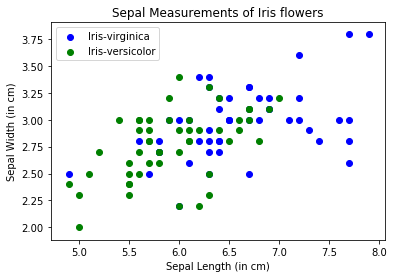

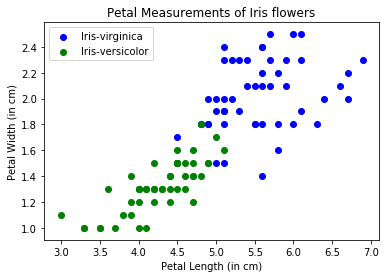

In [4]:
plt.scatter(sepal_iris_virginica['SepalLengthCm'], sepal_iris_virginica['SepalWidthCm'], color="blue", label="Iris-virginica")
plt.scatter(sepal_iris_versicolor['SepalLengthCm'], sepal_iris_versicolor['SepalWidthCm'], color="green", label="Iris-versicolor")
plt.title('Sepal Measurements of Iris flowers')
plt.xlabel('Sepal Length (in cm)')
plt.ylabel('Sepal Width (in cm)')
plt.legend()
plt.show()

plt.scatter(petal_iris_virginica['PetalLengthCm'], petal_iris_virginica['PetalWidthCm'], color="blue", label="Iris-virginica")
plt.scatter(petal_iris_versicolor['PetalLengthCm'], petal_iris_versicolor['PetalWidthCm'], color="green", label="Iris-versicolor")
plt.title('Petal Measurements of Iris flowers')
plt.xlabel('Petal Length (in cm)')
plt.ylabel('Petal Width (in cm)')
plt.legend()
plt.show()

<h2>Feature Selection and Encoding</h2>
<p>We now select the features we are going to use (sepal and petal measurements i.e SepalLengthCm, SepalWidthCm, PetalLengthCm and PetalWidthCm). After selecting the features, we also require to encode the class labels, that is, 1 for positive class and 0 for negative class.</p>
<p>We do the above steps using suitable NumPy and Pandas functions. After completion, we then perform the train-test split on our dataset. The train set will be used for training our neural network and the test set will be used for predicting unseen flowers.</p>

In [5]:
data = dataset[dataset['Species'] != 'Iris-setosa']
labels = data['Species']
features = data.drop(['Species'], axis=1).values

labels = np.where(labels == 'Iris-virginica', 1, 0)
labels = labels.reshape(labels.shape[0], 1)

features_train, features_test, labels_train, labels_test = train_test_split(features, labels, test_size=0.2, random_state=0)

<h2>Checking the dimensions of the data</h2>
<p>Just for our sanity check, we print out the shape / dimensions of our training set</p>

In [6]:
print(features_train.shape)
print(labels_train.shape)

(80, 4)
(80, 1)


<h2>DeepNN library</h2>
<p>This library is nothing but a regular Python class. This class utilizes Keras and Tensorflow to make our own custom neural network without any hassle. No more implementing forward propogation and backpropogation from scratch :).</p>
<p>This class contains three methods as follows :-</p>
<ol>
    <li>__init__( ):<br>
        This constructor initializes the neural network with L number of layers (excluding the input layer)</li>
    <li>train(X_train, Y_train):<br>
        This method takes in the training set as its argumetns, builds the L-layer neural network using Keras library and starts training it via the fit( ) method</li>
    <li>evaluate(X_test, Y_test):<br>
        This method takes in the testing set as its arguments, and using Keras' evaluate function we obtain the accuracy of our trained model</li>
    <li>plot_learning_curve( ):<br>
        This method utilized the metric obtained after training our model and plots the metric (accuracy) over the number of iterations or epochs we train our model using Matplotlib library</li>
</ol>    

In [7]:
class DeepNN(object):
    
    def __init__(self, num_layers = 4):
        self.num_layers = num_layers
        self.num_hidden_layers = self.num_layers - 1
        self.model = Sequential()
        
    def train(self, X_train, Y_train):
        m, n = X_train.shape[0], X_train.shape[1]
        self.batch_size = m
        self.model.add(Dense(m, input_shape=(n,)))
        for l in range(self.num_hidden_layers):
            self.model.add(Dense(n+1, activation='tanh'))
        self.model.add(Dense(1, activation='sigmoid'))
        self.model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
        self.history = self.model.fit(X_train, Y_train, epochs=200, batch_size=self.batch_size)
            
    def evaluate(self, X_test, Y_test):
        score = self.model.evaluate(X_test, Y_test, batch_size=self.batch_size)
        print("Accuracy : " + str(score[1] * 100) + " %")
        
    def plot_learning_curve(self):
        plt.plot(self.history.history['acc'])
        plt.title('Model accuracy')
        plt.ylabel('Accuracy')
        plt.xlabel('Epochs')
        plt.legend(['Training'], loc='upper left')
        plt.show()
    
classifier = DeepNN()

<h2>Training our neural network</h2>
<p>We call the train method on our library and pass the training set as its arguments.</p>

In [8]:
classifier.train(features_train, labels_train)

Epoch 1/200
80/80 [==============================] - 0s 3ms/step - loss: 0.7469 - acc: 0.5000
Epoch 2/200
80/80 [==============================] - 0s 19us/step - loss: 0.7383 - acc: 0.5000
Epoch 3/200
80/80 [==============================] - 0s 21us/step - loss: 0.7321 - acc: 0.5000
Epoch 4/200
80/80 [==============================] - 0s 22us/step - loss: 0.7268 - acc: 0.5000
Epoch 5/200
80/80 [==============================] - 0s 27us/step - loss: 0.7237 - acc: 0.5000
Epoch 6/200
80/80 [==============================] - 0s 19us/step - loss: 0.7168 - acc: 0.5000
Epoch 7/200
80/80 [==============================] - 0s 24us/step - loss: 0.7105 - acc: 0.5000
Epoch 8/200
80/80 [==============================] - 0s 17us/step - loss: 0.6956 - acc: 0.5000
Epoch 9/200
80/80 [==============================] - 0s 19us/step - loss: 0.6749 - acc: 0.5000
Epoch 10/200
80/80 [==============================] - 0s 20us/step - loss: 0.6698 - acc: 0.5000
Epoch 11/200
80/80 [==============================

Epoch 87/200
80/80 [==============================] - 0s 18us/step - loss: 0.4501 - acc: 0.9500
Epoch 88/200
80/80 [==============================] - 0s 18us/step - loss: 0.4480 - acc: 0.9625
Epoch 89/200
80/80 [==============================] - 0s 19us/step - loss: 0.4447 - acc: 0.9500
Epoch 90/200
80/80 [==============================] - 0s 17us/step - loss: 0.4427 - acc: 0.9625
Epoch 91/200
80/80 [==============================] - 0s 26us/step - loss: 0.4394 - acc: 0.9500
Epoch 92/200
80/80 [==============================] - 0s 17us/step - loss: 0.4374 - acc: 0.9625
Epoch 93/200
80/80 [==============================] - 0s 15us/step - loss: 0.4341 - acc: 0.9500
Epoch 94/200
80/80 [==============================] - 0s 15us/step - loss: 0.4321 - acc: 0.9625
Epoch 95/200
80/80 [==============================] - 0s 18us/step - loss: 0.4289 - acc: 0.9500
Epoch 96/200
80/80 [==============================] - 0s 17us/step - loss: 0.4269 - acc: 0.9625
Epoch 97/200
80/80 [====================

Epoch 172/200
80/80 [==============================] - 0s 17us/step - loss: 0.2609 - acc: 0.9750
Epoch 173/200
80/80 [==============================] - 0s 17us/step - loss: 0.2583 - acc: 0.9750
Epoch 174/200
80/80 [==============================] - 0s 16us/step - loss: 0.2576 - acc: 0.9750
Epoch 175/200
80/80 [==============================] - 0s 19us/step - loss: 0.2550 - acc: 0.9750
Epoch 176/200
80/80 [==============================] - 0s 17us/step - loss: 0.2543 - acc: 0.9750
Epoch 177/200
80/80 [==============================] - 0s 16us/step - loss: 0.2517 - acc: 0.9750
Epoch 178/200
80/80 [==============================] - 0s 17us/step - loss: 0.2510 - acc: 0.9750
Epoch 179/200
80/80 [==============================] - 0s 18us/step - loss: 0.2484 - acc: 0.9750
Epoch 180/200
80/80 [==============================] - 0s 17us/step - loss: 0.2477 - acc: 0.9750
Epoch 181/200
80/80 [==============================] - 0s 24us/step - loss: 0.2451 - acc: 0.9750
Epoch 182/200
80/80 [=========

<h2>Evaluating our neural network</h2>
<p>We call the evaluate method on our library and pass the testing set as its arguments.</p>

In [9]:
classifier.evaluate(features_test, labels_test)

20/20 [==============================] - 0s 2ms/step
Accuracy : 94.9999988079071 %


<h2>Plotting the learning curve</h2>
<p>We utilize the plot_learning_curve method of our library to visualize the accuracy of our neural network over the range of epochs we train the model</p>

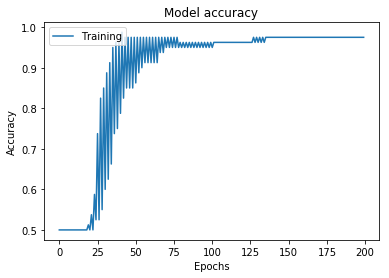

In [10]:
classifier.plot_learning_curve()